In [6]:
import tensorflow as tf

print(tf.__version__)

2.19.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#import dataset called "mnist" consists of 70,000 grayscale images in 10 categories.
#Each image is 28x28 pixels
fashion_mnist = tf.keras.datasets.fashion_mnist

#train_images and train_labels arrays are the training sets
#test_images, test_labels arrays are data will be used against the trained models
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
#check how many images in the training set and which size is each images are in
train_images.shape

(60000, 28, 28)

In [11]:
#check how many images in the test set and which size is each images are in
test_images.shape

(10000, 28, 28)

In [12]:
#check how many labels in the training ata set
len(train_labels)

60000

In [13]:

#check how many labels in the test ata set
len(test_labels)

10000

In [14]:
#print the labels.
#in this training set, each label has int between 0 and 9
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

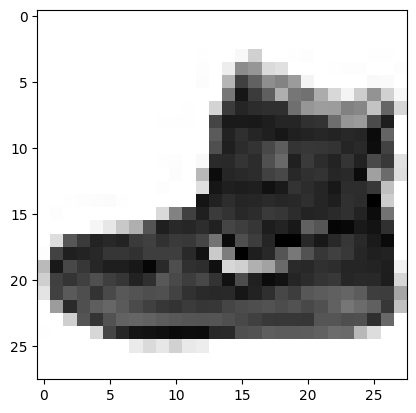

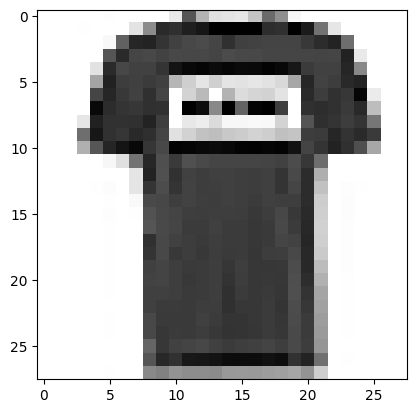

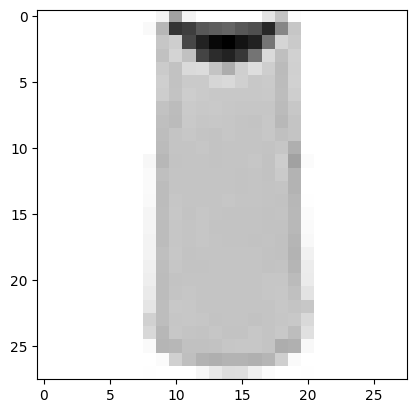

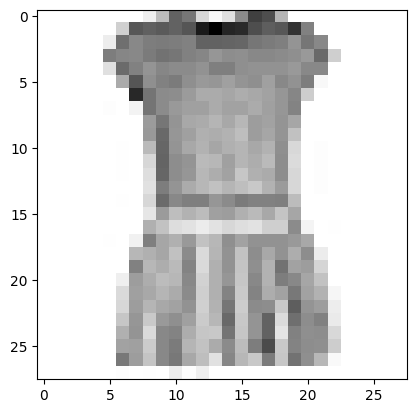

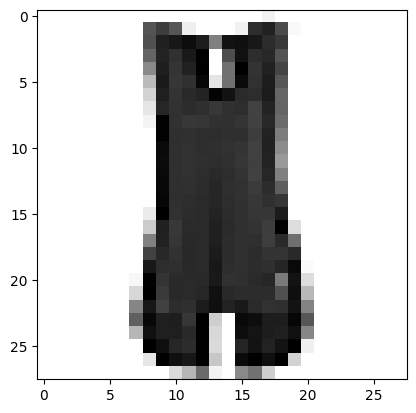

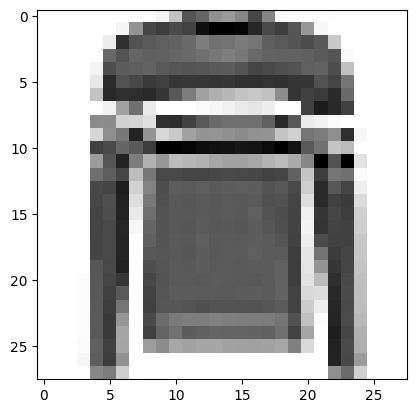

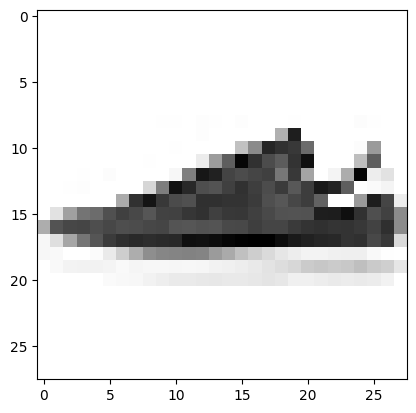

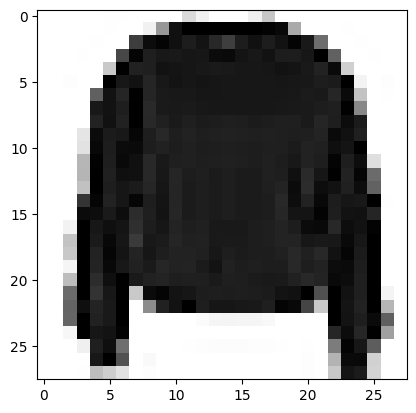

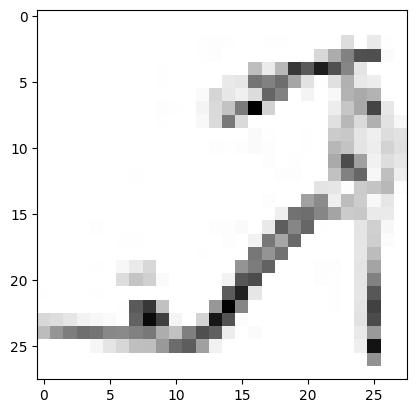

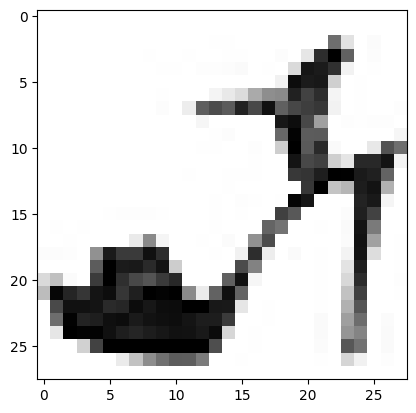

In [15]:
#print the first 10 images to see what data we are working with
#print the first 10 images, in black and white color
for i in range(10):
    plt.imshow(train_images[i], cmap="Greys")
    plt.show()


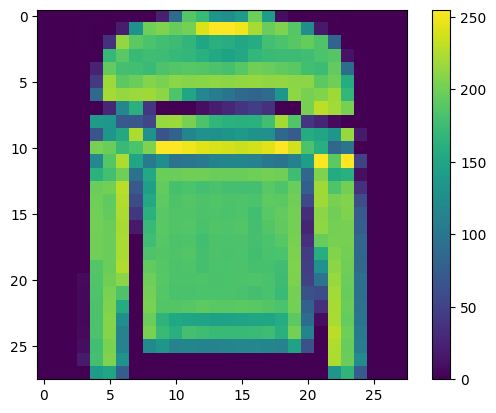

In [16]:
#see details of a single image
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
#Scale pixel values to a range of 0 to 1 before feeding them to the neural network model
#by dividing them by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

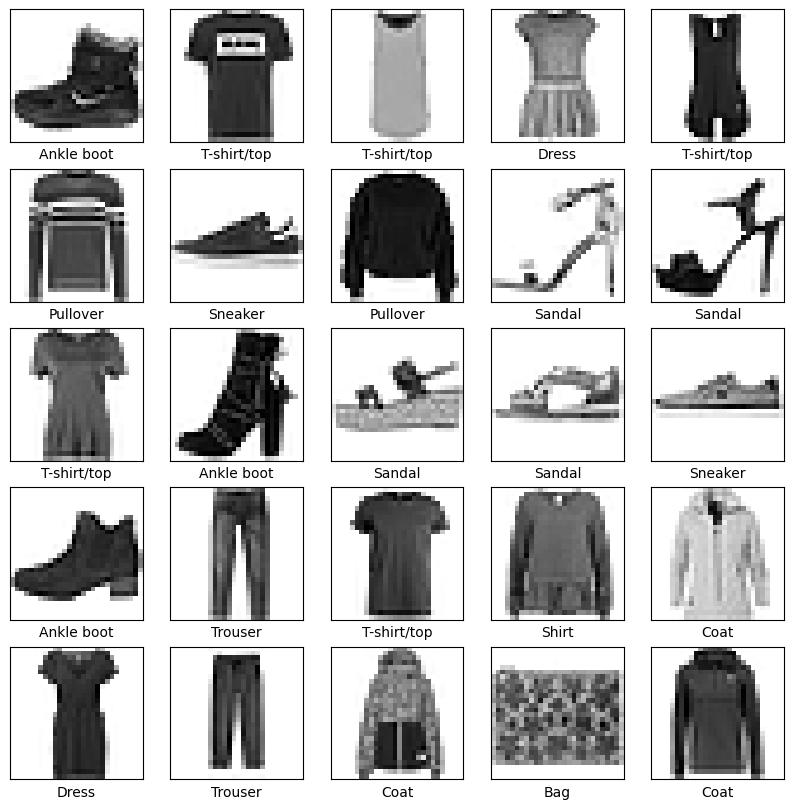

In [18]:
#print first 25 images to verify if they are in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [19]:
#setting up layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-11 00:00:36.866917: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
#compile the models
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
#train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2025-04-11 00:01:22.611490: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7783 - loss: 0.6321
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.3915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8769 - loss: 0.3383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8835 - loss: 0.3140
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8911 - loss: 0.2949
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8944 - loss: 0.2814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9021 - loss: 0.2690
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9040 - loss: 0.2573
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9081 - loss: 0.2484
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9087 - loss: 0.2446


In [22]:
#evaluate the accuracy and loss of the model in the test model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


2025-04-11 00:02:21.784813: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 0s - 1ms/step - accuracy: 0.8778 - loss: 0.3403

Test accuracy: 0.8777999877929688


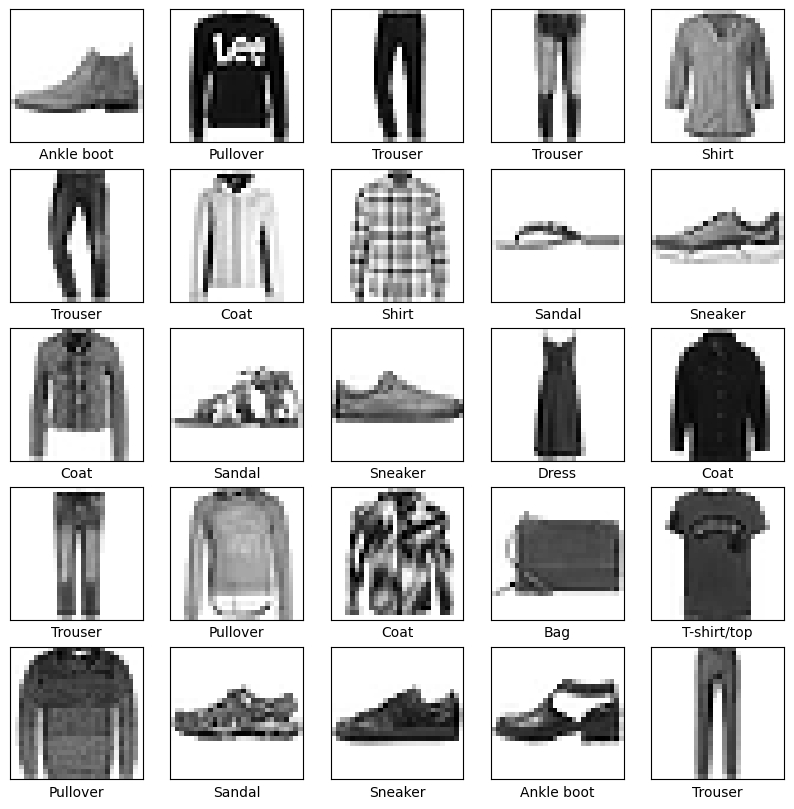

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()


In [24]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)


131/313 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step

2025-04-11 00:03:22.442175: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


In [26]:
predictions[0]


array([7.9081182e-08, 1.4658678e-09, 3.4586385e-08, 1.1256076e-10,
       1.5234025e-07, 4.3035554e-05, 2.8535646e-07, 7.9255644e-03,
       3.8620510e-07, 9.9203056e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])


np.int64(9)

In [28]:
test_labels[0]

np.uint8(9)

In [29]:
#graph all 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


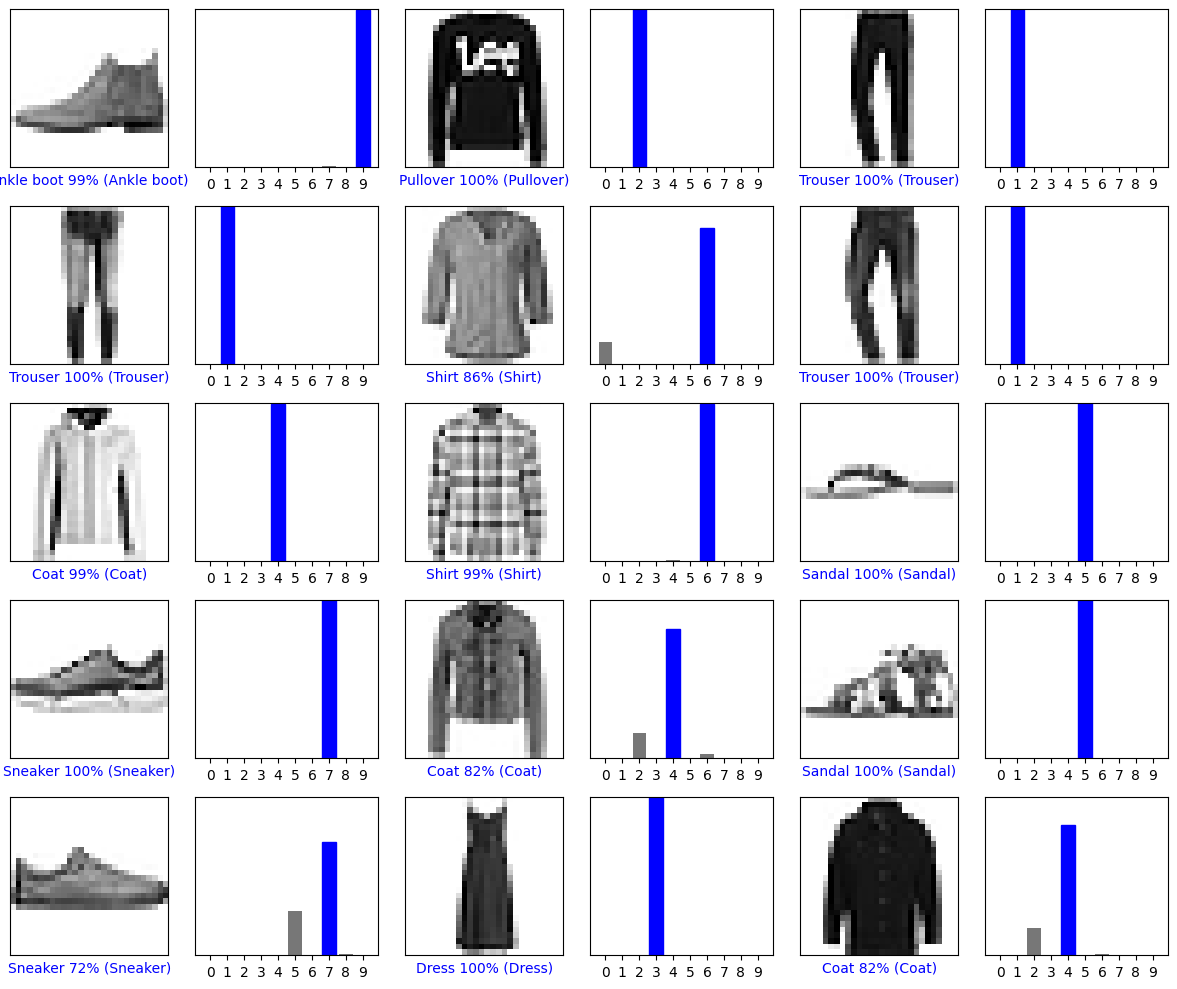

In [30]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
